In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/score_school.csv')

In [3]:
df.head()

,like_school,wenke_school,chinese,math,english,physics,chemistry,biology,politics,history,geography,location,time,wenke_score,like_score
0,南方医科大学,西北政法大学,96,115,135,70,61,66,31,94,74,河北,2020,545,543
1,成都理工大学工程技术学院,四川外国语大学成都学院,124,39,85,99,69,31,35,49,31,陕西,2019,363,447
2,贵州大学,上海政法学院,63,127,100,71,89,83,62,88,98,北京,2018,538,533
3,漯河医学高等专科学校,湖南铁路科技职业技术学院,74,46,112,76,36,42,55,63,42,海南,2019,392,386
4,南京师范大学,兰州大学,136,100,140,55,41,90,30,87,80,河南,2018,573,562


In [4]:
#去除空值
df = df.dropna()

In [5]:
df.head()

,like_school,wenke_school,chinese,math,english,physics,chemistry,biology,politics,history,geography,location,time,wenke_score,like_score
0,南方医科大学,西北政法大学,96,115,135,70,61,66,31,94,74,河北,2020,545,543
1,成都理工大学工程技术学院,四川外国语大学成都学院,124,39,85,99,69,31,35,49,31,陕西,2019,363,447
2,贵州大学,上海政法学院,63,127,100,71,89,83,62,88,98,北京,2018,538,533
3,漯河医学高等专科学校,湖南铁路科技职业技术学院,74,46,112,76,36,42,55,63,42,海南,2019,392,386
4,南京师范大学,兰州大学,136,100,140,55,41,90,30,87,80,河南,2018,573,562


In [6]:
#创建目标值
y = (df['like_score']+df['wenke_score'])/2
#x为第3列到第7列
X = df.iloc[:,2:8]


In [7]:
#划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=22)

In [8]:
#标准化
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()

In [9]:
#创建线性回归模型
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()

In [10]:
#模型训练
estimator.fit(X_train,y_train)

LinearRegression()

In [11]:
#模型评估
#1.获取系数等值
estimator.coef_

array([0.97931093, 1.00661269, 0.98129701, 0.4840774 , 0.51509537,
       0.48595145])

In [12]:
#2.获取偏置值
estimator.intercept_

101.64968723832317

In [13]:
#3.模型评估
y_predict = estimator.predict(X_test)
print('预测值为：\n',y_predict)
print('预测值与真实值的差值为：\n',y_predict-y_test)

预测值为：
 [478.53813349 442.32749048 503.70070665 ... 535.20811423 563.87386429
 392.47748807]
预测值与真实值的差值为：
 782    -19.461867
224      2.827490
3538   -35.299293
3497     7.413418
2650     8.381713
          ...    
1556     5.876607
1443     8.762884
4059   -17.791886
345     -6.126136
2141   -15.022512
Length: 1227, dtype: float64


In [14]:
## 查看模型的准确率
score = estimator.score(X_test,y_test)
print('准确率为：\n',score)

准确率为：
 0.9005739467137679


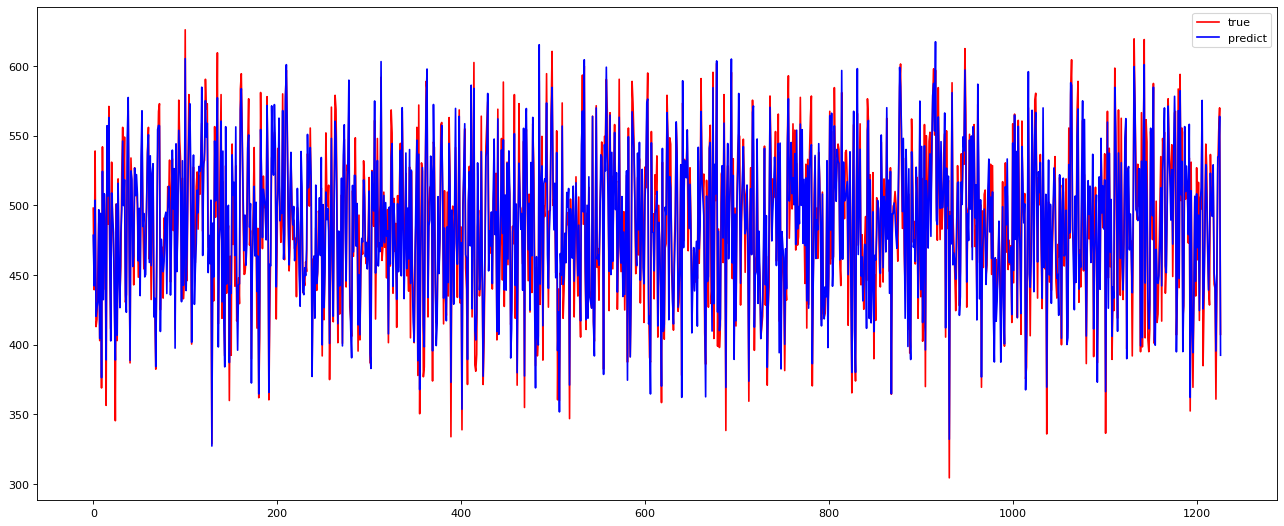

In [15]:
#可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8),dpi=80)
plt.plot(range(len(y_test)),y_test,color='red',label='true')
plt.plot(range(len(y_predict)),y_predict,color='blue',label='predict')
plt.legend()
plt.show()

In [16]:
# 保存模型
import joblib
joblib.dump(estimator,'./data/linear.pkl')

['./data/linear.pkl']

In [17]:
# 加载模型
estimator = joblib.load('./data/linear.pkl')

In [18]:
# 使用模型进行预测
y_predict = estimator.predict([[100,60,70,20,100,100]])#X_test值为
print('预测值为：\n',y_predict)

预测值为：
 [438.45456292]


C:\Users\28675\.conda\envs\ai\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
